## Online Simulation-Based Digital Twin: Nibelungenbrücke

This notebook introduces an online simulation-based digital twin developed for the Nibelungenbrücke bridge. The orchestration system is designed to interact dynamically with the user by gathering key inputs; such as time, physical parameters, and spatial positions to perform real-time simulations of the bridge structure.

The simulations are powered by the FenicSXConcrete package and support both thermomechanical and structural deflection analyses. This framework enables physics-based modeling and continuous digital monitoring of the bridge's behavior.




Please run the code below once to install the packages!

In [ ]:
#import sys
#!{sys.executable} -m pip install git+https://github.com/BAMresearch/FenicsXConcrete pint gmsh pytest jsonschema pandas pyproj tqdm pvlib

Following code snippet adjusts the current working directory and modifies the system path to ensure proper module resolution.

In [1]:
import os
import sys

original_cwd = os.getcwd()
root_dir = os.getcwd()
orchestrator_dir = os.path.join(root_dir, 'nibelungenbruecke', 'scripts', 'digital_twin_orchestrator')
os.chdir(orchestrator_dir)
sys.path.insert(0, root_dir)

from nibelungenbruecke.scripts.digital_twin_orchestrator.orchestrator import Orchestrator

### Definition of input parameters

This dictionary defines the configuration for running a digital twin simulation, including model selection, temporal settings, sensor definitions, and simulation options.

In [2]:
simulation_parameters = {
    'simulation_name': 'TestSimulation',
    'model': 'TransientThermal_1',
    'start_time': '2023-08-11T08:00:00Z',
    'end_time': '2023-09-11T08:01:00Z',
    'time_step': '10min',
    'virtual_sensor_positions': [
        {'x': 0.0, 'y': 0.0, 'z': 0.0, 'name': 'Sensor1'},
        {'x': 1.0, 'y': 0.0, 'z': 0.0, 'name': 'Sensor2'},
        {'x': 1.78, 'y': 0.0, 'z': 26.91, 'name': 'Sensor3'},
        {'x': -1.83, 'y': 0.0, 'z': 0.0, 'name': 'Sensor4'}
    ],
    'plot_pv': True,
    'full_field_results': False, # Set to True if you want full field results, the simulation will take longer and the results will be larger.
    'uncertainty_quantification': False, # Set to True if you want uncertainty quantification, the simulation will take longer and the results will be larger.
}

The Orchestrator class acts as the central controller for managing the entire digital twin simulation workflow. It handles configuration, setup, execution, and post-processing of simulations based on the provided input parameters.<br>
<br>
Orchestrator initialization with respect to the given parameters:

In [3]:
orchestrator = Orchestrator(simulation_parameters)

Provide your key to MKP's API to registers it with the Orchestrator instance for secure communication with the backend services.

In [4]:
#key=input("\nEnter the code to connect API: ").strip()
key = "nv8QrKftsTHj93hPM4-BiaJJYbWU7blfUGz89KdkuEbpAzFuHX1Rmg=="
orchestrator.set_api_key(key)

Before proceeding with the simulation, the `load()` method verifies whether the coordinates of the virtual sensors lie within the boundaries of the mesh domain.

In [5]:
orchestrator.load(simulation_parameters)

All virtual sensors are within the mesh domain.



The simulation is executed using:

Info    : Reading '../../../use_cases/nibelungenbruecke_demonstrator_self_weight_fenicsxconcrete/input/models/mesh_3d 1.msh'...
Info    : 2443 entities
Info    : 2197 nodes
Info    : 12920 elements
Info    : Done reading '../../../use_cases/nibelungenbruecke_demonstrator_self_weight_fenicsxconcrete/input/models/mesh_3d 1.msh'
New model 'thermal_model' saved successfully.
Info    : Reading '../../../use_cases/nibelungenbruecke_demonstrator_self_weight_fenicsxconcrete/input/models/mesh_3d 1.msh'...
Info    : 2443 entities
Info    : 2197 nodes
Info    : 12920 elements
Info    : Done reading '../../../use_cases/nibelungenbruecke_demonstrator_self_weight_fenicsxconcrete/input/models/mesh_3d 1.msh'


100%|██████████| 4281/4281 [30:32<00:00,  2.34it/s]


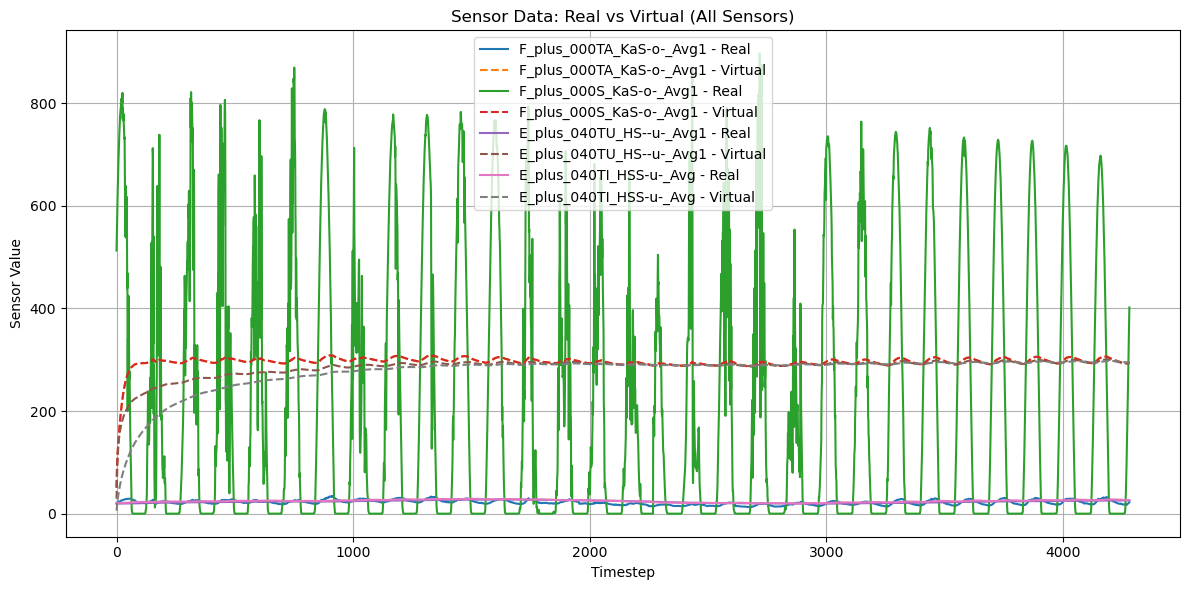


--- Extracting virtual sensor data ---

Sensor 'Sensor1' -> nearest node index: 2036
Nearest node coordinates: [1.78443926e-11 0.00000000e+00 0.00000000e+00]

Sensor 'Sensor2' -> nearest node index: 2009
Nearest node coordinates: [0.91433333 0.         0.79320833]

Sensor 'Sensor3' -> nearest node index: 710
Nearest node coordinates: [ 1.78466667  0.         26.96908333]

Sensor 'Sensor4' -> nearest node index: 2097
Nearest node coordinates: [-1.83  0.    0.  ]


In [6]:

results = orchestrator.run()

### Results
The result at the sensors defined in simulation_parameters are plotted below.

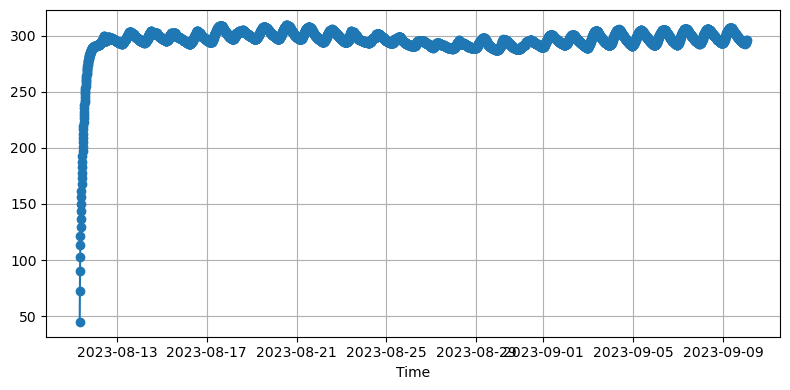

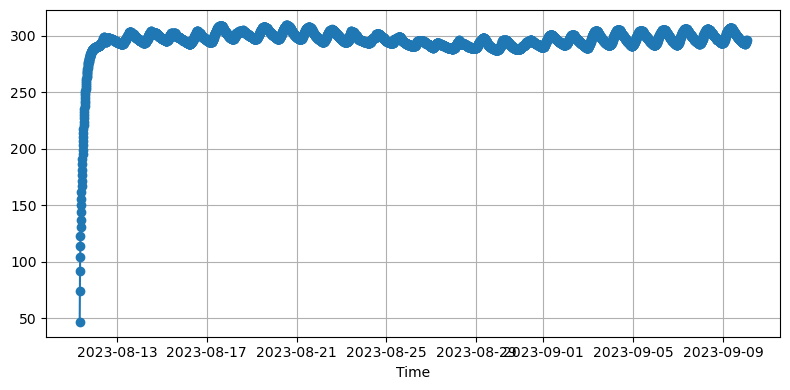

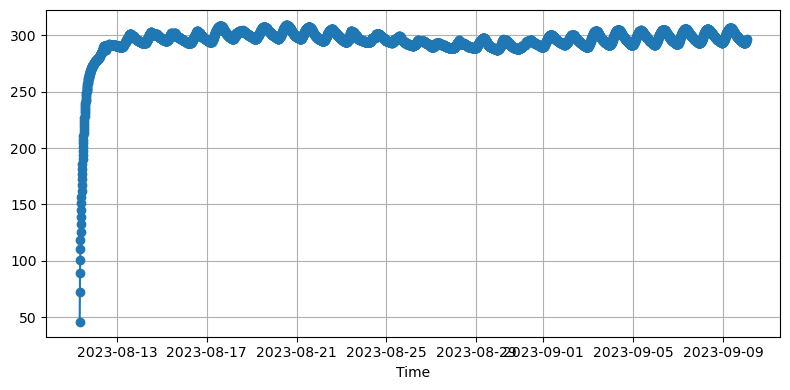

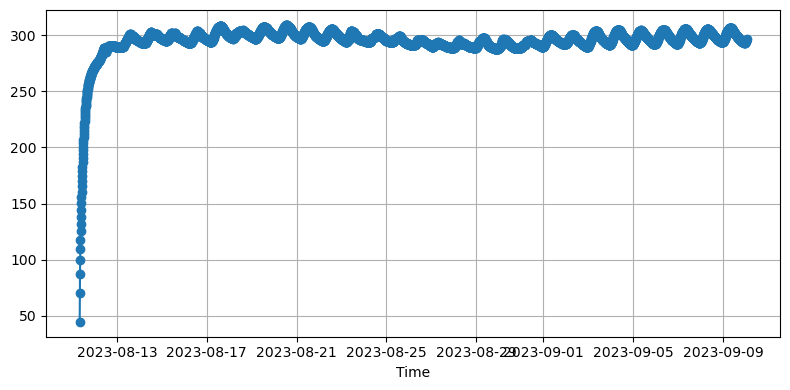

In [7]:
orchestrator.plot_virtual_sensor_data()

We can plot aswell a comparison between model response and real sensors when available:

In [ ]:
# orchestrator.plot_results_at_real_sensors(results, uncertainty_quantification=simulation_parameters['uncertainty_quantification'])  # Plot the results, this can be done after the run or separately if needed.

## Additional results (only if run)

### Full-field response (3D)

The full-field simulation results can be reached with the following method.<br>

! Interactive visualization within the interface is not yet supported but will be introduced soon. Meanwhile files can be downloaded from the specified paths printed below.

In [8]:
orchestrator.plot_full_field_response()

Path to full-field results:
TransientThermal_1 -> h5py_path: ../../../use_cases/nibelungenbruecke_demonstrator_self_weight_fenicsxconcrete/output/paraview/Nibelungenbruecke_thermal.h5
TransientThermal_1 -> xmdf_path: ../../../use_cases/nibelungenbruecke_demonstrator_self_weight_fenicsxconcrete/output/paraview/Nibelungenbruecke_thermal.xmdf


### Thermal Model Uncertainty Quantification

Uncertainty quantification for the thermal model has been introduced. To enable this feature:  
- Set the parameter `uncertainty_quantification` to `True`  
- Ensure the parameter `plot_pv` is set to `False`  

This configuration activates the uncertainty analysis.

In [9]:
simulation_parameters = {
    'simulation_name': 'TestSimulation',
    'model': 'TransientThermal_1',
    'start_time': '2023-08-11T08:00:00Z',
    'end_time': '2023-09-11T08:01:00Z',
    'time_step': '10min',
    'virtual_sensor_positions': [
        {'x': 0.0, 'y': 0.0, 'z': 0.0, 'name': 'Sensor1'},
        {'x': 1.0, 'y': 0.0, 'z': 0.0, 'name': 'Sensor2'},
        {'x': 1.78, 'y': 0.0, 'z': 26.91, 'name': 'Sensor3'},
        {'x': -1.83, 'y': 0.0, 'z': 0.0, 'name': 'Sensor4'}
    ],
    'plot_pv': False,
    'full_field_results': False, # Set to True if you want full field results, the simulation will take longer and the results will be larger.
    'uncertainty_quantification': True, # Set to True if you want uncertainty quantification, the simulation will take longer and the results will be larger.
}

Checking 

In [13]:
orchestrator.load(simulation_parameters)
orchestrator.run(simulation_parameters)

AttributeError: 'Orchestrator' object has no attribute 'api_key'

In [ ]:
orchestrator.plot_virtual_sensor_data()

Orchestrator can also analysis displacement models. 

In [ ]:
simulation_parameters = {       ##Throw an error checking UQ!!
        'simulation_name': 'TestSimulation',
        'model': 'Displacement_1',
        'start_time': '2023-08-11T08:00:00Z',
        'end_time': '2023-08-11T08:10:00Z',
        'time_step': '10min',
        'virtual_sensor_positions': [
            {'x': 0.0, 'y': 0.0, 'z': 0.0, 'name': 'Sensor1'},
            {'x': 1.0, 'y': 0.0, 'z': 0.0, 'name': 'Sensor2'}
            # Note: the real sensor positions are added automatically by the interface, so you don't need to specify them here.
        ],
        'plot_pv': True,
        'full_field_results': False, # Set to True if you want full field results, the simulation will take longer and the results will be larger.
        'uncertainty_quantification': False, # Set to True if you want uncertainty quantification, the simulation will take longer and the results will be larger.
    }

In [ ]:
orchestrator.run()

In [ ]:
orchestrator.plot_virtual_sensor_data()

In [ ]:
os.chdir(original_cwd)
print("Working directory restored to:", original_cwd)